<a href="https://colab.research.google.com/github/JuliaWPereira/deep_learning/blob/master/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Conhecendo o conjunto de dados

***Deep Learning:*** Em português, é o aprendizado profundo de máquina. Nele, as funções extraem as características das imagens. Não ensinamos os modelo, extraímos as características com as funções. Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções do Deep Learning extraem essas características, pois entendem quais características são essas.

In [0]:
# Importando o Keras
import tensorflow
from tensorflow import keras

# Acessando um dataset no Keras
dataset = keras.datasets.fashion_mnist

# Carregando dados do dataset
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [18]:
# Entendendo o resultado
len(imagens_treino)
print(imagens_treino.shape)
print(imagens_teste.shape)

(60000, 28, 28)
(10000, 28, 28)


É interessante o fato  de que as imagens de teste e treino têm as mesmas dimensões, pois assim o treino e o teste fica mais coerente e com maior acurácia.

A tupla (60000, 28, 28) indica que temos 60000 imagens, que são compostas, respectivamente, de 28 colunas e de 28 linhas.

Text(0.5, 1.0, '9')

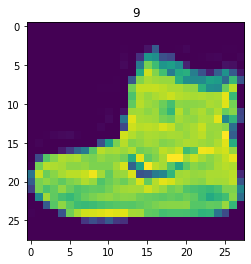

In [19]:
# Imprimindo imagens com matplotlib.pyplot
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

**Outras APIs de *Deep Learning*:** 

* **Caffe:** do grupo de pesquisa da universidade de Berkeley
* **Torch:** uma implementação usando Lua
* **PyTprch:** uma variação do Torch para Python
* **CNTK:** da Microsoft
* **DL4J:** uma implementação usando Java
* **MXNet:** da Apache. 

0
9


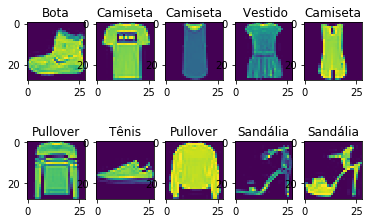

In [20]:
# Estudando as classificações feitas
print(identificacoes_treino.min())
print(identificacoes_treino.max())
total_de_classificacoes = 10

# Definimos manualmente de acordo com o github desse dataset quais os nomes das classes
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', ' Vestido', 
                           'Casaco', 'Sandália', 'Camisa', 'Tênis', 
                           'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[ identificacoes_treino[imagem]])

# Refatoração do Código 

Imports


In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Carregando o Dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos Dados

In [23]:
len(imagens_treino)
print(imagens_treino.shape)
print(imagens_teste.shape)
print(identificacoes_treino.min())
print(identificacoes_treino.max())

(60000, 28, 28)
(10000, 28, 28)
0
9


Exibição dos Dados

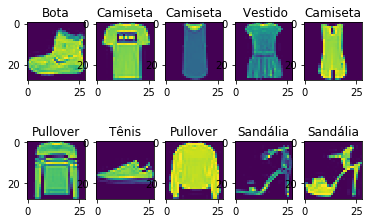

In [24]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', ' Vestido', 
                           'Casaco', 'Sandália', 'Camisa', 'Tênis', 
                           'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[ identificacoes_treino[imagem]])


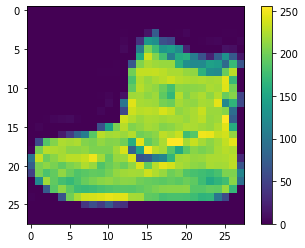

In [25]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Definindo o Modelo

**Entrada:** É a camada zero. Nela redimensionamos os pixels da entrada, fazendo um achatamento, para processar a entrada.

**Camada Dense:** Camada densamente conectada com a anterior. Usamos a função *relu* da biblioteca *neural networks* do *tensorflow* para trabalhar. A relu é uma função não linear.

**Saída com Softmax:** A função softmax olha, para cada nó recebido, qual a probabilidade de ele ser de cada classificação. Daí ele escolhe como "classificação vencedora" aquela de maior probabilidade.

**Modelo compilado:** esse modelo com o Keras precisa ser compilado antes de ser usado.

**Época:** A contagem que aparece no número de épocas se refere a quantas vezes passamos por cada uma das imagens de treino ao treinarmos a nossa rede.

**Normalização:** Dividir por 255 para as cores variarem de 0 a 255.

**Camadas Ocultas:** São as camadas intermediárias.

In [29]:
# Normalização
imagens_treino = imagens_treino/255.0

modelo = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(256, activation=tensorflow.nn.relu),
                          keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                        ])


modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 100us/sample - loss: 1.0353 - acc: 0.6756 - val_loss: 0.6689 - val_acc: 0.7527
Epoch 2/10
48000/48000 [==============================] - 5s 98us/sample - loss: 0.6177 - acc: 0.7774 - val_loss: 0.5718 - val_acc: 0.7952
Epoch 3/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.5457 - acc: 0.8049 - val_loss: 0.5258 - val_acc: 0.8106
Epoch 4/10
48000/48000 [==============================] - 5s 98us/sample - loss: 0.5051 - acc: 0.8210 - val_loss: 0.4937 - val_acc: 0.8254
Epoch 5/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4786 - acc: 0.8323 - val_loss: 0.4819 - val_acc: 0.8254
Epoch 6/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.4600 - acc: 0.8393 - val_loss: 0.4595 - val_acc: 0.8380
Epoch 7/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.4463 - acc: 0.8434 - val_loss:

# Overfitting e Underfitting

***Overfitting*:** É quando o modelo se adapta demais ao treino e falha mais na validação. Você percebe isso no gráfico de erro, porque o erro do teste cai e o erro da validação sobe por época

***Underfitting*:** É quando os dados se adaptam pouco ao treino. Você observa isso principalmente pela baixa taxa de acerto.

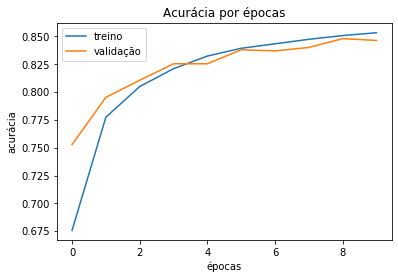

In [34]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

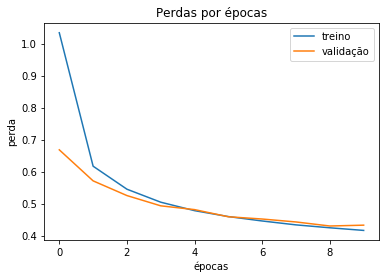

In [35]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [27]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste:  2
número da imagem de teste: 2


In [28]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste )

10000/10000 [==============================] - 0s 41us/sample - loss: 58.9778 - acc: 0.8729
Perda do teste: 58.97783394479752
Acurácia do teste: 0.8729


# Modelando com Neurônios Dormentes


In [36]:
# Normalização
imagens_treino = imagens_treino/255.0

modelo = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(256, activation=tensorflow.nn.relu),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                        ])


modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 113us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3022 - val_acc: 0.0983
Epoch 2/10
48000/48000 [==============================] - 5s 105us/sample - loss: 2.3010 - acc: 0.1152 - val_loss: 2.2987 - val_acc: 0.0958
Epoch 3/10
48000/48000 [==============================] - 5s 107us/sample - loss: 2.2941 - acc: 0.1438 - val_loss: 2.2865 - val_acc: 0.2382
Epoch 4/10
48000/48000 [==============================] - 5s 107us/sample - loss: 2.2750 - acc: 0.1961 - val_loss: 2.2608 - val_acc: 0.1590
Epoch 5/10
48000/48000 [==============================] - 5s 108us/sample - loss: 2.2412 - acc: 0.2322 - val_loss: 2.2173 - val_acc: 0.2923
Epoch 6/10
48000/48000 [==============================] - 5s 108us/sample - loss: 2.1953 - acc: 0.2615 - val_loss: 2.1669 - val_acc: 0.3141
Epoch 7/10
48000/48000 [==============================] - 5s 109us/sample - loss: 2.1437 - acc: 0.2835 - val_l

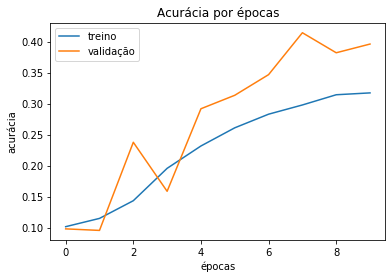

In [37]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

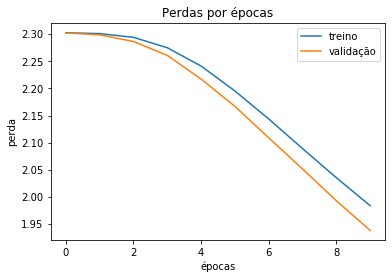

In [38]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [0]:
# Salvando o modelo
modelo.save('modelo.h5')

In [45]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [47]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])


resultado teste: 2
número da imagem de teste: 2
